<a href="https://colab.research.google.com/github/swarna32/bangla_news_detector/blob/main/bangla_news_detector_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import re
import string
import bn_lib # bn_lib url: https://drive.google.com/drive/folders/1YVRnDu5_FlaF1SEp0f81v9rtUU6XK_CY?usp=sharing
%pip install bangla-stemmer
from bangla_stemmer.stemmer.stemmer import BanglaStemmer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

real = pd.read_csv('/content/drive/MyDrive/Datasets/LabeledAuthentic-7K.csv') # Authentic News
fake = pd.read_csv('/content/drive/MyDrive/Datasets/LabeledFake-1K.csv') # Fake News

df_merge = pd.concat([fake, real], axis=0)
df_merge.drop(['articleID', 'date', 'F-type'], axis = 1, inplace = True)
# df_merge.isnull().sum()

df = df_merge.sample(frac=1)

In [ ]:

df['news'] = df['headline'] + ' ' + df['content']
df.drop(['headline', 'content'], axis = 1, inplace = True)

cols = [
    'domain', 'category', 'source', 'relation', 'news', 'label'
]

df = df.reindex(labels=cols, axis=1)
df.head()

,domain,category,source,relation,news,label
5075,prothomalo.com,National,উপজেলা নির্বাহী কর্মকর্তা (ইউএনও),Related,আ.লীগের দুই উপদলের সংঘাত এড়াতে চরভদ্রাসনে ১৪৪ ...,1.0
608,prothomalo.com,Sports,Reporter,Related,আজ ভারতের বিপক্ষে কেমন হবে বাংলাদেশের একাদশ? আ...,1.0
5535,bd24live.com,National,Reporter,Related,শাড়ি পড়ুন মাত্র ৫ সেকেন্ডে! (ভিডিও) শাড়ি ভারত...,1.0
6047,banglanews24.com,Politics,জাতীয় পার্টির (জাপা) চেয়ারম্যান,Related,ইভিএমের পক্ষে নই: এরশাদ রংপুর: জাতীয় পার্টির (...,1.0
2878,banglanews24.com,International,জেলার পুলিশ সুপার,Related,শিমলায় গাড়ি গিরিখাদে পড়ে নিহত ১৩ ভারতের পার্বত...,1.0


In [ ]:
# NLP

punctuations = bn_lib.punctuations
stopwords = bn_lib.stopwords
stemmer = BanglaStemmer()

def remove_punctuation(txt):
    txt_nopunc = "".join([c for c in txt if c not in punctuations])
    return txt_nopunc

def remove_english_punctuation(txt):
    txt_nopunc = "".join([c for c in txt if c not in string.punctuation])
    return txt_nopunc

def remove_stopwords(txt):
    txt_clean = "".join([word for word in txt if word not in stopwords])
    return txt_clean

def stemming(txt_no_sw):
    stemmed_txt = "".join([stemmer.stem(word) for word in txt_no_sw])
    return stemmed_txt

def tokenize(txt):
    tokens = re.split('\s+', txt)
    return tokens

In [ ]:

df['domain'] = df['domain'].apply(lambda x: x.lower())
df['domain'] = df['domain'].apply(lambda x: remove_punctuation(x))

df['category'] = df['category'].apply(lambda x: x.lower())
df['category'] = df['category'].apply(lambda x: remove_punctuation(x))

df['source'] = df['source'].apply(lambda x: x.lower())
df['source'] = df['source'].apply(lambda x: remove_punctuation(x))

df['relation'] = df['relation'].apply(lambda x: x.lower())
df['relation'] = df['relation'].apply(lambda x: remove_punctuation(x))

df['news'] = df['news'].apply(lambda x: x.lower())
df['news'] = df.news.apply(lambda x: remove_english_punctuation(x))
df['news'] = df.news.apply(lambda x: remove_punctuation(x))
df['news'] = df.news.apply(lambda x: remove_stopwords(x))
df['news'] = df.news.apply(lambda x: stemming(x))
df['news'] = df.news.apply(lambda x: ' '.join(x.split()))

df['label'] = df['label'].apply(lambda x: int(x))

Streaming output truncated to the last 5000 lines.
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applied second rules..
applie

In [ ]:
df.head()

,domain,category,source,relation,news,label
6287,independent24com,national,পুলিশ,related,মহেশখালীটেকনাফে পুলিশের সঙ্গে গোলাগুলিতে নিহত ...,1
647,bengalbeatscom,miscellaneous,reporter,unrelated,বার চাঁদে ক নোয়াখাল্যার সন্ধান পেলো নাসার বিজ্...,0
1186,bnbanglafactcom,international,reporter,related,মসজিদে বায়ুত্যাগের অপরাধে পাকিস্তানে যুবকের মৃ...,0
6366,banglatribunecom,national,রেলওয়ে পুলিশের পরিদর্শক,related,চট্টগ্রামে রেললানের পাশ থেকে অজ্ঞাত যুবকের লাশ...,1
2239,bd24livecom,entertainment,reporter,related,স্বপ্নে কল্পনা করেননি অভিনয়শিল্পী হবেন যে তারক...,1


In [ ]:

# saving the file to save 15 mins of my life each time i run this
df.to_csv('clean_news.csv')

In [ ]:

clean_df = pd.read_csv('/content/drive/MyDrive/Datasets/clean_news.csv')
clean_df = clean_df.drop('Unnamed: 0', axis=1)
clean_df['test'] = clean_df.domain + ' ' +  clean_df.category + ' ' + clean_df.source + ' ' + clean_df.relation + ' ' + clean_df.news
clean_df = clean_df.drop(['domain', 'category', 'source', 'relation', 'news'], axis=1)
indx = ['test', 'label']
clean_df = clean_df.reindex(labels = indx, axis = 1)

x = clean_df.drop(['label'], axis = 1)
y = clean_df['label']

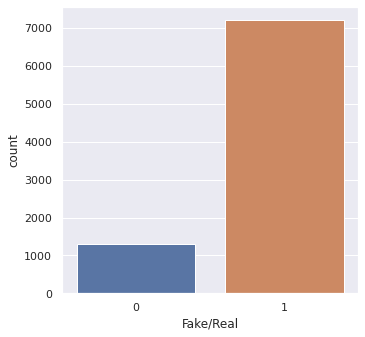

In [ ]:

#Plot total number of real and fake news

import matplotlib.pyplot as plt
%matplotlib inline
# !pip install seaborn
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,5.27)})

plt.subplot(1,2,1)
news_plt = sns.countplot(x = 'label', data = clean_df)
news_plt.set_xlabel('Fake/Real')
plt.show()

In [ ]:

# Classification Begins
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(encoding="utf-8", analyzer=tokenize)
xv = vect.fit_transform(x.test)

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(xv, y, test_size=0.3, random_state=0, stratify=y)

y_train.value_counts() # Imbalance :/

1    5041
0     909
Name: label, dtype: int64

In [ ]:

# Creating Synthetic Fake News To Handle Imbalance

# !pip install imblearn
from imblearn.over_sampling import SMOTE # takes avg of neighboring data and creates new data
smote = SMOTE(sampling_strategy='minority')
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:

from collections import Counter
print('Before SMOTE: ', Counter(y_train))
print('After SMOTE: ', Counter(y_train_smote)) # Balanced Yahoo!!!

Before SMOTE:  Counter({1: 5041, 0: 909})
After SMOTE:  Counter({1: 5041, 0: 5041})


In [ ]:

from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

0.9259114072912583
              precision    recall  f1-score   support

           0       0.83      0.64      0.73       390
           1       0.94      0.98      0.96      2161

    accuracy                           0.93      2551
   macro avg       0.89      0.81      0.84      2551
weighted avg       0.92      0.93      0.92      2551



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


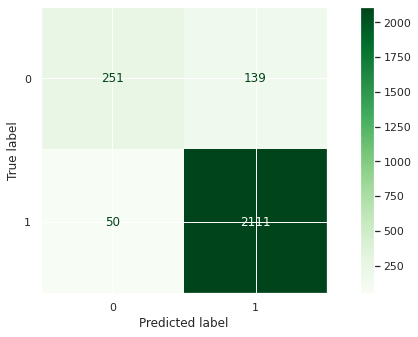

In [ ]:

# Naive Bayes
BNB = BernoulliNB()
BNB.fit(X_train, y_train)
print(BNB.score(X_test, y_test))
pred_NB = BNB.predict(X_test)
print(classification_report(y_test, pred_NB))
# print(confusion_matrix(y_test, pred_NB))
plot_confusion_matrix(BNB, X_test, y_test,cmap="Greens")
plt.show()

0.968639749117993
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       390
           1       0.98      0.98      0.98      2161

    accuracy                           0.97      2551
   macro avg       0.94      0.94      0.94      2551
weighted avg       0.97      0.97      0.97      2551



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


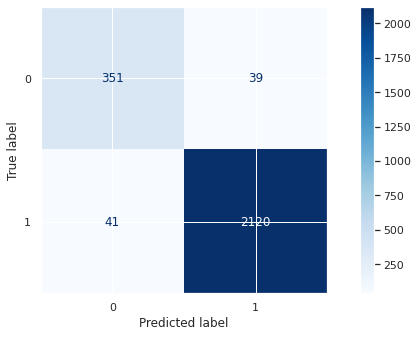

In [ ]:

# Logistic Regression
LR = LogisticRegression(random_state=0)
LR.fit(X_train_smote, y_train_smote)
print(LR.score(X_test, y_test))
pred_LR = LR.predict(X_test)
print(classification_report(y_test, pred_LR))
# print(confusion_matrix(y_test, pred_LR))
plot_confusion_matrix(LR, X_test, y_test,cmap="Blues")
plt.show()

0.9890239121912975
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       390
           1       0.99      1.00      0.99      2161

    accuracy                           0.99      2551
   macro avg       0.99      0.97      0.98      2551
weighted avg       0.99      0.99      0.99      2551



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


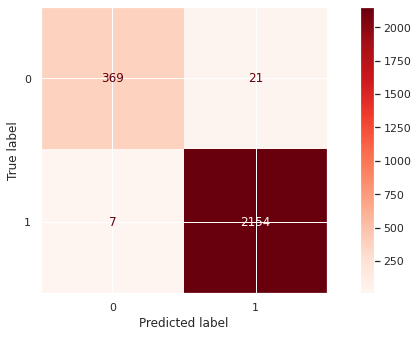

In [ ]:

# Decision Tree
DT = DecisionTreeClassifier(random_state=0)
DT.fit(X_train, y_train)
print(DT.score(X_test, y_test))
pred_DT = DT.predict(X_test)
print(classification_report(y_test, pred_DT))
# print(confusion_matrix(y_test, pred_DT)) # Way to go DT!!
plot_confusion_matrix(DT, X_test, y_test,cmap="Reds")
plt.show()

0.9890239121912975
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       390
           1       0.99      1.00      0.99      2161

    accuracy                           0.99      2551
   macro avg       0.99      0.97      0.98      2551
weighted avg       0.99      0.99      0.99      2551



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


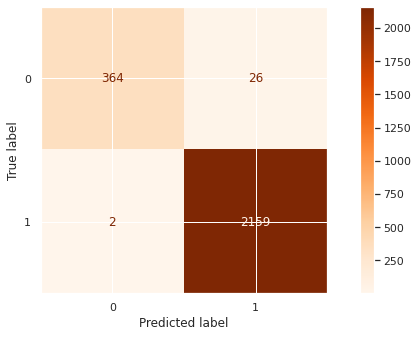

In [ ]:

# Gradient Boosting
GB = GradientBoostingClassifier(random_state=0)
GB.fit(X_train, y_train)
print(GB.score(X_test, y_test))
pred_GB = GB.predict(X_test)
print(classification_report(y_test, pred_GB))
# print(confusion_matrix(y_test, pred_GB))
plot_confusion_matrix(GB, X_test, y_test,cmap="Oranges")
plt.show()

0.9831438651509212
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       390
           1       0.98      1.00      0.99      2161

    accuracy                           0.98      2551
   macro avg       0.98      0.95      0.97      2551
weighted avg       0.98      0.98      0.98      2551

[[ 356   34]
 [   9 2152]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


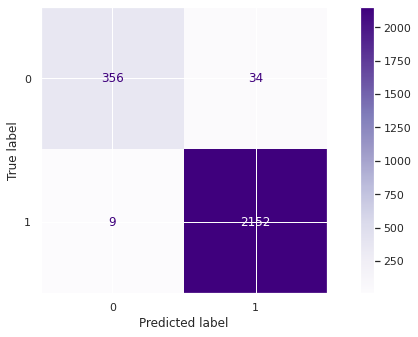

In [ ]:

# SVM
SV = SVC(kernel='linear', gamma=0.1, probability=1, random_state=0)
SV.fit(X_train_smote, y_train_smote)
print(SV.score(X_test, y_test))
pred_SV = SV.predict(X_test)
print(classification_report(y_test, pred_SV))
print(confusion_matrix(y_test, pred_SV))
plot_confusion_matrix(SV, X_test, y_test,cmap="Purples")
plt.show()

[0.96086106 0.95882353 0.96666667 0.94509804 0.94901961]
              precision    recall  f1-score   support

           0       0.99      0.88      0.93       390
           1       0.98      1.00      0.99      2161

    accuracy                           0.98      2551
   macro avg       0.98      0.94      0.96      2551
weighted avg       0.98      0.98      0.98      2551



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


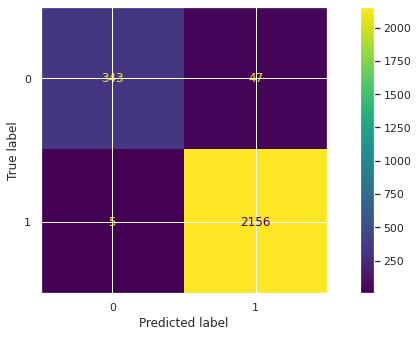

In [ ]:

# Voting Classifier (Ensemble ✊)

# Hard Voting
hard_vote = VotingClassifier(estimators=[('bnb', BNB), ('lr', LR), ('dt', DT), ('gb', GB), ('svm', SV)], voting='hard')
hard_vote.fit(X_train, y_train)
y_pred_hard = hard_vote.predict(X_test)
print(cross_val_score(hard_vote, X_test, y_test))
print(classification_report(y_test, y_pred_hard))
# print(confusion_matrix(y_test, y_pred_hard))
plot_confusion_matrix(hard_vote, X_test, y_test)
plt.show()

[0.97651663 0.98431373 0.97647059 0.98235294 0.96862745]
              precision    recall  f1-score   support

           0       0.99      0.92      0.96       390
           1       0.99      1.00      0.99      2161

    accuracy                           0.99      2551
   macro avg       0.99      0.96      0.98      2551
weighted avg       0.99      0.99      0.99      2551



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


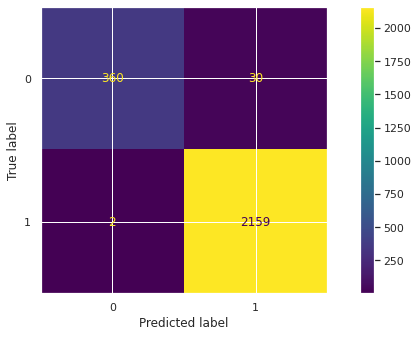

In [ ]:

# Soft Voting
soft_vote = VotingClassifier(estimators=[('bnb', BNB), ('lr', LR), ('dt', DT), ('gb', GB), ('svm', SV)], voting='soft')
soft_vote.fit(X_train, y_train)
soft_pred = soft_vote.predict(X_test)
print(cross_val_score(soft_vote, X_test, y_test)) # Clearly soft voting is better in this case than hard voting
print(classification_report(y_test, soft_pred))
# print(confusion_matrix(y_test, soft_pred))
plot_confusion_matrix(soft_vote, X_test, y_test)
plt.show()

In [ ]:

# ROC-AUC
from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classfiers and make a list
classifiers = [
               BernoulliNB(),
               LogisticRegression(random_state=0),
               DecisionTreeClassifier(random_state=0),
               GradientBoostingClassifier(random_state=0),
               SVC(kernel='linear', gamma=0.1, probability=1, random_state=0),
               VotingClassifier(estimators=[('bnb', BNB), ('lr', LR), ('dt', DT), ('gb', GB), ('svm', SV)], voting='soft')
               ]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)

    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

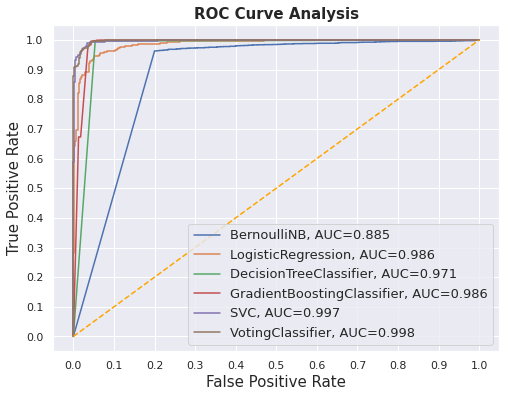

In [ ]:

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score
models = {}
accuracy, precision, recall = {}, {}, {}
models['Naive Bayes']=  BernoulliNB();
models['Logistic Regression']= LogisticRegression(random_state=0);
models['Decision Tree']=  DecisionTreeClassifier(random_state=0);
models['GB']=  GradientBoostingClassifier(random_state=0);
models['SVM']=  SVC(kernel='linear', gamma=0.1, probability=1, random_state=0);
models['Soft Voting']=  VotingClassifier(estimators=[('bnb', BNB), ('lr', LR), ('dt', DT), ('gb', GB), ('svm', SV)], voting='soft');

for key in models.keys():
    # Fit the classifier
    models[key].fit(X_train, y_train)

    # Make predictions
    predictions = models[key].predict(X_test)

    # Calculate metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

In [ ]:

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Naive Bayes,0.925911,0.976863,0.938222
Logistic Regression,0.937672,0.996761,0.934085
Decision Tree,0.989024,0.996761,0.990345
GB,0.989024,0.999075,0.988101
SVM,0.976872,0.996761,0.976428
Soft Voting,0.987456,0.999075,0.986295


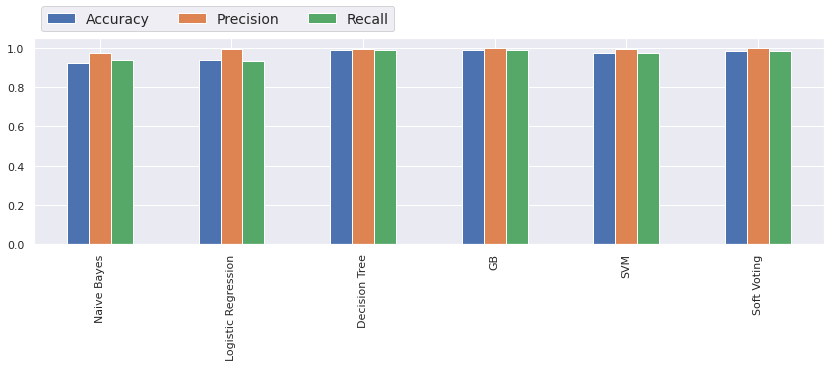

In [ ]:

ax = df_model.plot.bar()
ax.legend(
    ncol=len(models.keys()),
    bbox_to_anchor=(0, 1),
    loc='lower left',
    prop={'size': 14}
)
plt.tight_layout()

In [ ]:

# Prediction [0 for Fake, 1 for Real]
news = [
    'bengalbeats.com miscellaneous reporter unrelated জেলে খাই বেহেস্তি খানা ট্রাইবুনালে যাওয়া মানা নিজামী দৈনিক মতিকণ্ঠ কারাগার মতিবেদকঢাকা কেন্দ্রীয় কারাগারে উচ্চ রক্তচাপে আক্রান্ত বৃহত্তর জামায়াতে সলামীর খানকির পোলায়ে আমীর  কাত্তরে আল বদরের কমান্ডার মতিউর রহমান নিজামী বলেছেন জেলে খা বেহেস্তি খানা ট্রাবুনালে তা যায়া মানামংগলবার সন্ধায় কেন্দ্রীয় কারাগারে আয়জিত ক সংবাদ সম্মেলনে আল বদর কমান্ডার নিজামী  কথা বলেন সময় তাকে হাস্যজ্জল দেখাচ্ছিলসংবাদ সম্মেলনে নিজামী বলেন আমাদের কারাগারগুলিতে খানাপিনার বেবস্থা মাশাল্লাহ ফাশ কিলাশ কাশিমপুর কারাগারে সকালের নাশতায় আমায় দেয়া হত লাল আটার পাঁচটি রুটি সঙ্গে ডিম ভাজি আলু ছাড়া সবজি ভাজি মুরগির মাংস মিষ্টি নসির দুধ  কলা নাশতা খায়া হজম করিয়া সারতারি না তার আগে চলিয়া আসিত দুপুরের খাবারের চিকন চালের ভাত করলা ভাজি টাকি বা চিংড়ি মাছ ভর্তা বেগুন ভাজি বা ভর্তা ছোট মাছ বা চিংড়ি মাছ ভুনা সালাদ  লেবু মাল্টা বা বর বা নাশপাতি তারপর পেট ভরিয়া খানাদানার পর দিতাম ঘুম ঘুম ভাংগিয়া সন্ধ্যার খাবারে খাতাম লাড্ডু নিমকিবিস্কুট  হরলিকস বা স্যুপ তারপর কারাগারে কুন কচি মোজাহিদের সংগে নিবিড় বেয়াম করতাম কিছুক্ষন রাতের খাবারে আসিত চিকন চালের ভাত করলা ভাজি বেগুন ভাজি বা ভর্তা ঢেড়শ বা মিষ্টিকুমড়া বা পেঁপে ভাজি গরু বা খাসির মাংস ভুনা সালাদ  লেবু বং কমলা মাল্টা নাশপাতি আঙুর বা বরআবেগঘন কণ্ঠে নিজামী বলেন আমি জানি বেহেস্তে যায়ার কুন সুযুগ আমার না আমার বিপদ ফাঁসির পর কবরে আযাব দিয়া শুরু হবে দোজখের আগুনে জ্বলিয়া পুড়িয়া আখেরাতে গিয়া শেষ হবে  সুদির্ঘ জীবনে কারাগারে কাটান বতসরগুলু আমার জীবনের শ্রেষ্ঠ সময়  যেন দুনিয়ার বুকে ক টুকরু শাদ্দাদের বেহেস্ত খায়া শোয়ার অপুর্ব বন্দবস্তহাসতে হাসতে নিজামী বলেন রুপ খানাপিনা করলে রক্তচাপ বৃদ্দি পায়া স্বাভাবিক তা আজ সকালে ডাক্তারকে ডাকিয়া বললাম ডাক্তার ডাক্তার শুন না ত বেশী ভাত খায়া ভাল না ডাক্তার আসিয়া আমায় কিছুক্ষন টিপিয়া টুপিয়া চলিয়া গেল কারাগারের নায়েবে আমীর ফরমান আলী ছার আসিয়া আমায় বললেন নিজামী সাব আজকের দিনটা রেষ্টে থাকেন ট্রাবুনালে গিয়া কাম নাঅশ্রু মুছে নিজামী বলেন কারাগারের নায়েব ফরমান আলী ছারের মত ভাল বেক্তি দানীং আর দেখা যায় না কাত্তর সালে আরেক ফরমান আলীর আন্ডারে কিছুদিন কাম করার অভিজ্ঞতা হছিল সে ফরমান আলীর পর চারটি দশক কাটিয়া গেল তারপর পালাম  ফরমান আলীরে তার নাম শুনিয়া আমার রক্তচাপ দেড় পেসকেল কমিয়া গিয়াছেঅচিরে সুস্থ হয়ে ট্রাবুনালের রায় শ্রবনের চ্ছা বেক্ত করে নিজামী বলেন শুনিলাম সলামী ছাত্র সংস্থার ২৪টি যুবতী ফিপটি শেডস অফ গ্রে সহ ধরা পড়িয়াছে উহাদের আমার কারাকক্ষে পাঠান হলে শাদ্দাদের বেহেস্ত দেখা ষুল আনা পুরন হত',
    'motichurladdoo.com national reporter unrelated এবার মশার বিরুদ্ধে গর্জে উঠলো ছাত্রলীগের কামান সম্প্রতি ঢাকা বিশ্ববিদ্যালয় প্রাঙ্গণে ছাত্রলীগের কটি অংশকে মশা মারার যন্ত্র নিয়ে ঘুরে ঘুরে মশা মারতে দেখা যায় বিস্তারিত খোঁজ করতে গেলে জানা যায় ছাত্রলীগের সাধারণ সম্পাদক গোলাম রাব্বানী ডেঙ্গু জ্বরে আক্রান্ত হবার পর ঢাবি ক্যাম্পাসে মশা নিধন কর্মসূচি নিয়েছে সংগঠনটির নেতাকর্মীরাগতকাল ২৪ নভেম্বর সন্ধ্যায় ছাত্রলীগের সভাপতি সঞ্জিত চন্দ্র দাসের নেতৃত্বে মধুর ক্যান্টিন থেকে  মশা নিধন অভিযান শুরু হয় ক্যাম্পাসের বিভিন্ন গুরুত্বপূর্ণ স্থান বং হলগুলোর আশেপাশে মশা মারার ষুধ দেন তারা ব্যাপারে সংগঠনটির কজন কর্মীর কাছে জানতে চায়া হলে তিনি মশা মারতে ব্যস্ত আছেন বলে জানান পাশে থাকা তার কজন সহমত ভা আমাদের বলেন বাংলাদেশে মশার কোন স্থান নে মশা মন কটা পতঙ্গ যাকে বাংলার মানুষ চায় না আমরা অনেক আগে থেকে  কর্মসূচি নেবার কথা চিন্তা করছিলাম কিন্তু বিভিন্ন নির্বাচনী ব্যস্ততায় করা হয়ে ঠেনি তবে বার গোলাম রাব্বানী ভায়ের অসুস্থতার পর আমরা আর বসে থাকতে পারলাম নাসহমত ভাটি আর জানান কথায় আছে মশা মারতে কামান লাগে সিটি কর্পোরেশন যে তোদিন ধরে মশা দমন কর্মসূচি পালন করে আসলো কিন্তু তাতে কোন লাভ না হয়াতে বাধ্য হয়ে আমাদের নিজস্ব স্পেশাল কামান দিয়ে  দমন কর্মসূচি শুরু করা হয়েছেআরেকজন সহমত ভা জানান আরো কটি চাঞ্চল্যকর তথ্য  দমন অভিযানকে সফল করার জন্যে ছাত্রলীগ কটি আলাদা সংগঠন খোলার কথা চিন্তা করছে সংগঠনটির নাম হবে মশকী দমন দপ্তর রফে মদদ তিনি উচ্ছ্বসিত হয়ে আরো বলেন বিরোধী দল বারবার আমাদেরকে মদদপুষ্ট দল হিসেবে আখ্যা দিয়ে সেছে না গেস হোয়াট আমরা খন আসলে মদদয়ালা কটা দল হিসেবে আত্মপ্রকাশ করতে চলেছি পর্যায়ে নিজের গালে বসা কটি মশাকে মারতে গিয়ে তিনি কিঞ্চিত আঘাতপ্রাপ্ত হন কটু সামলে নিয়ে তিনি যোগ করেন আমরা সবাকে কটা মেসেজ দিতে চা যে সকল মদদ খারাপ না কিছু কিছু মদদ দেশ  দশের কাজে লাগে ছাড়া আমরা কঠোর হাতে  দমন কর্মসূচি চালিয়ে যাবোতার বক্তব্য শেষ হয়ার সঙ্গে সঙ্গে অন্য কজন জুনিয়র সহমত ভা সহমত পোষণ করে স্লোগানের সুরে বলেন মশকীর আস্তানা বাংলাদেশে থাকবে না দেশের সাধারণ জনগণের প্রতি আমাদের আকুতি দয়া করে আপনারা মশা মারুন আপনারা মশা না মারলে মশা আপনাকে মেরে ফেলবে দয়া করে ঘুমিয়ে থাকবেন না উঠুন জাগুন প্রয়োজনে মশা মারতে কামান দাগুনতবে নাম প্রকাশে অনিচ্ছুক ক অসহমত ভা আমাদের প্রতিবেদককে কিছুটা নিচু স্বরে জানিয়েছেন রাব্বানী ভা কবার বিজয় সরণির জ্যামে পড়লে আশা করি আমরা বিপুল নেতাকর্মীকে বিজয় সরণিতে জ্যাম সমস্যা সমাধানের লক্ষ্যে মাঠে নামতে দেখতে পাবো',
    'jagonews24.com national reporter related রেমিটেন্স অ্যাওয়ার্ড পেলো ইসলামী ব্যাংক সর্বোচ্চ রেমিটেন্স আহরণের জন্য বাংলাদেশ ব্যাংক রেমিটেন্স অ্যায়ার্ড ২০১৭ লাভ করেছে সলামী ব্যাংক বাংলাদেশ লিমিটেড বৃহস্পতিবার ২০ সেপ্টেম্বর বাংলাদেশ ব্যাংক ট্রেনিং কাডেমি মিলনায়তনে ক অনুষ্ঠানে ব্যাংকের ম্যানেজিং ডিরেক্টর মডি প্রধান নির্বাহী সি মো মাহবুব উল আলমের হাতে পুরস্কার তুলে দেন অর্থমন্ত্রী আবুল মাল আব্দুল মুহিত বাংলাদেশ ব্যাংকের নির্বাহী পরিচালক মো আব্দুর রহিম সভাপতিত্বে অনুষ্ঠানে বিশেষ অতিথি হিসেবে উপস্থিত ছিলেনবাংলাদেশ ব্যাংকের গভর্ণর ফজলে কবির অর্থমন্ত্রণালয়ের আর্থিক প্রতিষ্ঠান বিভাগের অতিরিক্ত সচিব কামরুন নাহার আহমেদ প্রবাসী কল্যাণ বৈদেশিক কর্মসংস্থান মন্ত্রণালয়ের অতিরিক্ত সচিব ড আহমেদ মুনিরুছ সালেহীন সময় সলামী ব্যাংকের ডেপুটি ম্যানেজিং ডিরেক্টর ন্টারন্যাশনাল ব্যাংকিং উং প্রধান হাসনে আলমসহ বিভিন্ন ব্যাংকের ঊর্ধ্বতন নির্বাহী প্রবাসীরা উপস্থিত ছিলেন'
]
news_count = vect.transform(news)

In [ ]:

print(BNB.predict(news_count))
print(LR.predict(news_count))
print(DT.predict(news_count))
print(GB.predict(news_count))
print(SV.predict(news_count)) # Voila! 😎

[0 0 1]
[0 0 1]
[0 0 1]
[0 0 1]
[0 0 1]


In [ ]:

print(soft_vote.predict(news_count)) # Main Man

[0 0 1]


In [ ]:

# Final Section
def output_label(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Real News"

def manual_testing(news):
    news_test = {'text': [news]}
    test_df = pd.DataFrame(news_test)
    test_df.text = test_df['text'].apply(lambda x: x.lower())
    test_df.text = test_df['text'].apply(lambda x: remove_english_punctuation(x))
    test_df.text = test_df['text'].apply(lambda x: remove_punctuation(x))
    test_df.text = test_df['text'].apply(lambda x: remove_stopwords(x))
    test_df.text = test_df['text'].apply(lambda x: stemming(x))
    test_df.text = test_df['text'].apply(lambda x: ' '.join(x.split()))
    new_xv_test = vect.transform(test_df.text)
    pred = soft_vote.predict(new_xv_test)
    return print('\n\nPrediction: {}'.format(output_label(pred)))

In [ ]:

# Decision
inp_domain = str(input("Enter domain: "))
inp_category = str(input("Enter category: "))
inp_source = str(input("Enter source: "))
inp_relation = str(input("Enter relation: "))
inp_title = str(input("Enter title: "))
inp_content = str(input("Enter content: "))

inp_news = inp_domain + ' ' + inp_category + ' ' + inp_source + ' ' + inp_relation + ' ' + inp_title + ' ' + inp_content
manual_testing(inp_news)

In [ ]:

# GUI (Fun Part)
! pip install anvil-uplink
import anvil.server
anvil.server.connect("JJ45XIOBJFSOXCFOMBBDFZ2O-PHI3UST2KK4ANNJD")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.4 MB/s 
     |████████████████████████████████| 51 kB 232 kB/s 
  Created wheel for ws4py: filename=ws4py-0.5.1-py3-none-any.whl size=45229 sha256=77a459806ca68236e4a421a3c18b36203ab053d6f05ca6d6afc049aee5c375e5
  Stored in directory: /root/.cache/pip/wheels/29/ea/7d/3410aa0aa0e4402ead9a7a97ab2214804887e0f5c2b76f0c96
Successfully built ws4py


Connecting to wss://anvil.works/uplink
Anvil websocket open
Connected to "Default environment" as SERVER


In [ ]:

@anvil.server.callable
def pred_news(news):
    news = news.lower()
    news = remove_english_punctuation(news)
    news = remove_punctuation(news)
    news = remove_stopwords(news)
    news = stemming(news)
    news = ' '.join(news.split())
    news = [news]
    xv = vect.transform(news)
    preds = soft_vote.predict(xv)
    label = output_label(preds)
    return str(label)